In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt
%matplotlib inline




In [2]:
df1= pd.read_csv('C:\\Users\\LENOVO\\Downloads\\Power Bi MADAW STOR DATA\\Details.csv')

In [3]:
df2= pd.read_csv('C:\\Users\\LENOVO\\Downloads\\Power Bi MADAW STOR DATA\\Orders.csv')

In [4]:
df= pd.merge(df1, df2, on='Order ID', suffixes=('_left', '_right'))



In [5]:
df.head()

,Order ID,Amount,Profit,Quantity,Category,Sub-Category,PaymentMode,Order Date,CustomerName,State,City
0,B-25681,1096,658,7,Electronics,Electronic Games,COD,04-06-2018,Bhawna,Madhya Pradesh,Indore
1,B-26055,5729,64,14,Furniture,Chairs,EMI,10-03-2018,Harivansh,Uttar Pradesh,Mathura
2,B-25955,2927,146,8,Furniture,Bookcases,EMI,16-01-2018,Shiva,Maharashtra,Pune
3,B-26093,2847,712,8,Electronics,Printers,Credit Card,27-03-2018,Sarita,Maharashtra,Pune
4,B-25602,2617,1151,4,Electronics,Phones,Credit Card,01-04-2018,Vrinda,Maharashtra,Pune


In [14]:
df.shape

(1500, 11)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Order ID      1500 non-null   object
 1   Amount        1500 non-null   int64 
 2   Profit        1500 non-null   int64 
 3   Quantity      1500 non-null   int64 
 4   Category      1500 non-null   object
 5   Sub-Category  1500 non-null   object
 6   PaymentMode   1500 non-null   object
 7   Order Date    1500 non-null   object
 8   CustomerName  1500 non-null   object
 9   State         1500 non-null   object
 10  City          1500 non-null   object
dtypes: int64(3), object(8)
memory usage: 129.0+ KB


In [7]:
df.isnull().sum()

Order ID        0
Amount          0
Profit          0
Quantity        0
Category        0
Sub-Category    0
PaymentMode     0
Order Date      0
CustomerName    0
State           0
City            0
dtype: int64

In [8]:
df['Order Date'] = pd.to_datetime(df['Order Date'], format='%d-%m-%Y')

In [9]:
df.columns

Index(['Order ID', 'Amount', 'Profit', 'Quantity', 'Category', 'Sub-Category',
       'PaymentMode', 'Order Date', 'CustomerName', 'State', 'City'],
      dtype='object')

In [10]:
df['Order Date'] = pd.to_datetime(df['Order Date'])

# Add a new column for the month
df['Month'] = df['Order Date'].dt.month

In [11]:
df.columns

Index(['Order ID', 'Amount', 'Profit', 'Quantity', 'Category', 'Sub-Category',
       'PaymentMode', 'Order Date', 'CustomerName', 'State', 'City', 'Month'],
      dtype='object')

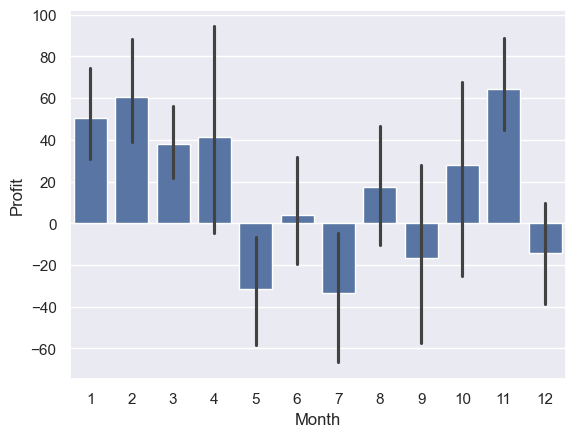

In [53]:

M_P= sns.barplot(data= df, x= 'Month', y= 'Profit')

#sns.set(rc={'figuer.figsaiz': (10,5)})
#if bars in M_P.contaniners:
    #M_P.bar_label(bars)


    



In [35]:


import pandas as pd
import matplotlib.pyplot as plt


# Calculate profit by sub-category

profit_by_sub_category = df.groupby('Sub-Category')['Profit'].sum().reset_index()

In [33]:
# Sort and select top 5 sub-categories
top_5_sub_categories = profit_by_sub_category.sort_values(by='Profit', ascending=False).head(5)

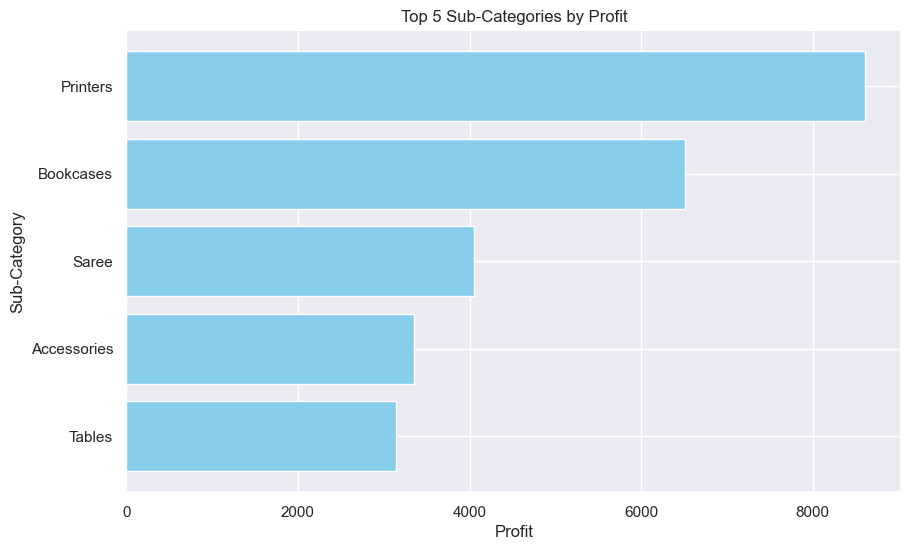

In [37]:
plt.figure(figsize=(10, 6))
plt.barh(top_5_sub_categories['Sub-Category'], top_5_sub_categories['Profit'], color='skyblue')
plt.xlabel('Profit')
plt.ylabel('Sub-Category')
plt.title('Top 5 Sub-Categories by Profit')
plt.gca().invert_yaxis()  # Invert y-axis to have the highest profit on top
plt.show()

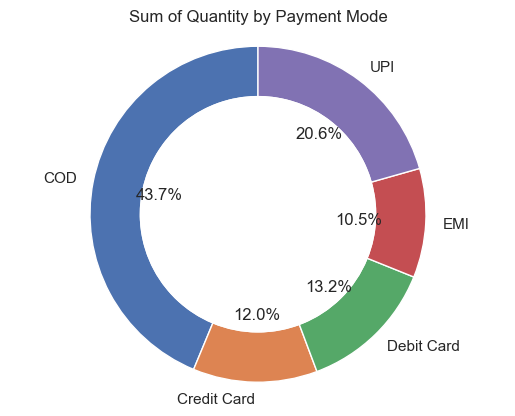

In [38]:
# Group by PaymentMode and sum the Quantity
grouped_data = df.groupby('PaymentMode')['Quantity'].sum()

# Create a pie chart
fig, ax = plt.subplots()
ax.pie(grouped_data, labels=grouped_data.index, autopct='%1.1f%%', startangle=90, wedgeprops=dict(width=0.3))

# Draw a circle at the center to make it a doughnut chart
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig.gca().add_artist(centre_circle)

# Equal aspect ratio ensures that pie is drawn as a circle.
ax.axis('equal')  
plt.title('Sum of Quantity by Payment Mode')
plt.show()

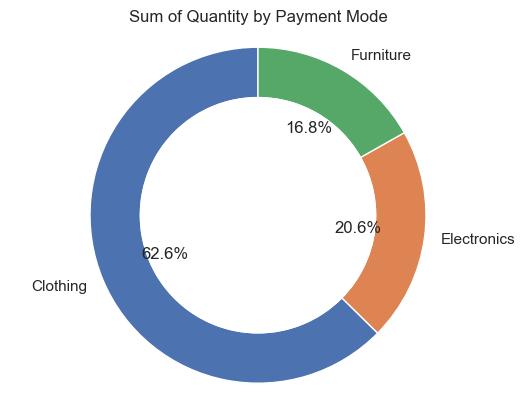

In [39]:
# Group by PaymentMode and sum the Quantity
grouped_data = df.groupby('Category')['Quantity'].sum()

# Create a pie chart
fig, ax = plt.subplots()
ax.pie(grouped_data, labels=grouped_data.index, autopct='%1.1f%%', startangle=90, wedgeprops=dict(width=0.3))

# Draw a circle at the center to make it a doughnut chart
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig.gca().add_artist(centre_circle)

# Equal aspect ratio ensures that pie is drawn as a circle.
ax.axis('equal')  
plt.title('Sum of Quantity by Payment Mode')
plt.show()



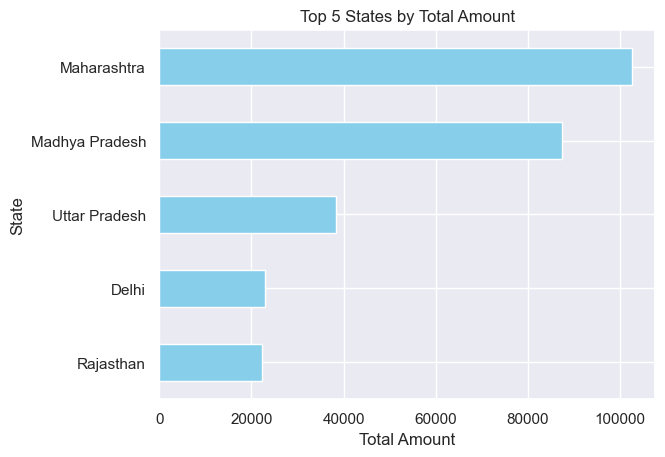

In [40]:
# Group by State and sum the Amount
grouped_data = df.groupby('State')['Amount'].sum().sort_values(ascending=False)

# Select top 5 states
top_5_states = grouped_data.head(5)

# Create a horizontal bar chart
fig, ax = plt.subplots()
top_5_states.plot(kind='barh', ax=ax, color='skyblue')

# Invert y-axis to have the highest value at the top
ax.invert_yaxis()

# Add labels and title
ax.set_xlabel('Total Amount')
ax.set_ylabel('State')
ax.set_title('Top 5 States by Total Amount')

# Show the plot
plt.show()


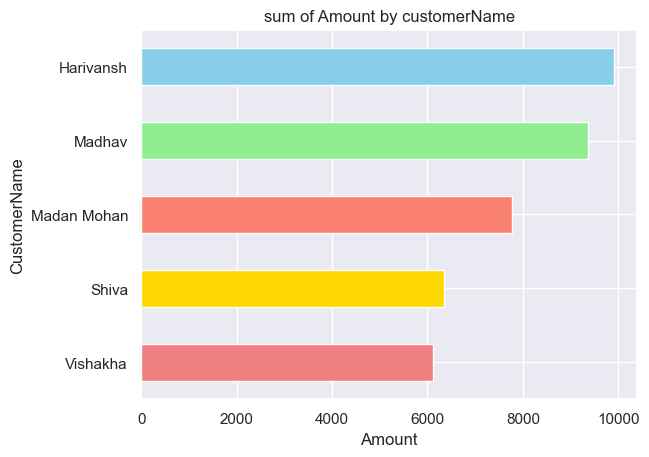

In [49]:
grouped_data= df.groupby('CustomerName')['Amount'].sum().sort_values(ascending= False)
top_5_CustomerName= grouped_data.head(5)
fig, ax= plt.subplots()
colors = ['skyblue', 'lightgreen', 'salmon', 'gold', 'lightcoral']
top_5_CustomerName.plot(kind= 'barh', ax=ax, color= colors)
ax.invert_yaxis()
ax.set_xlabel('Amount')
ax.set_ylabel('CustomerName')
ax.set_title('sum of Amount by customerName')
plt.show()









C:\Users\LENOVO\AppData\Local\Temp\ipykernel_1476\2135134652.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  M_P = sns.barplot(data=df, x='Month', y='Profit', palette=colors)
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_1476\2135134652.py:12: UserWarning: The palette list has more values (1500) than needed (12), which may not be intended.
  M_P = sns.barplot(data=df, x='Month', y='Profit', palette=colors)


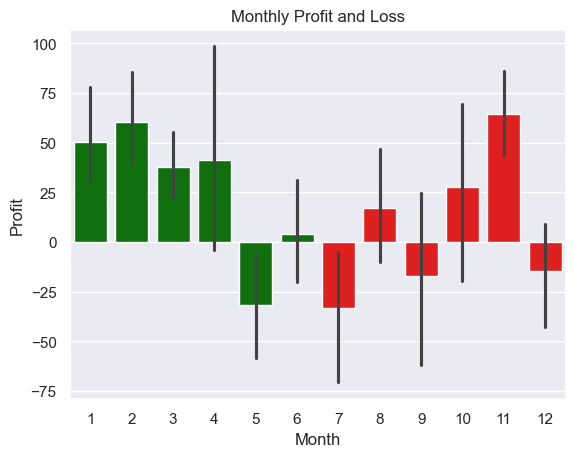

In [56]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define a function to assign colors based on profit values
def color_bars(profit):
    return ['green' if p >= 0 else 'red' for p in profit]

# Apply the function to create a list of colors
colors = color_bars(df['Profit'])

# Create the bar plot with custom colors
M_P = sns.barplot(data=df, x='Month', y='Profit', palette=colors)

# Customize the plot
M_P.set_title('Monthly Profit and Loss')
M_P.set_xlabel('Month')
M_P.set_ylabel('Profit')

# Display the plot
plt.show()
